In [3]:
import pandas as pd
import fastai
import torch
from fastai.vision.all import *

In [5]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
path=Path("drive/MyDrive/pnevmoniya/train")
test_path=Path("drive/MyDrive/pnevmoniya/test")
test=get_image_files(test_path)
sample_solution=pd.read_csv("drive/MyDrive/pnevmoniya/sample_solution.csv")

In [3]:
path.ls()

(#2) [Path('drive/MyDrive/pnevmoniya/train/NORMAL'),Path('drive/MyDrive/pnevmoniya/train/PNEUMONIA')]

In [4]:
get_image_files(path)

(#5216) [Path('drive/MyDrive/pnevmoniya/train/NORMAL/IM-0525-0001-0002.jpeg'),Path('drive/MyDrive/pnevmoniya/train/NORMAL/IM-0524-0001.jpeg'),Path('drive/MyDrive/pnevmoniya/train/NORMAL/IM-0533-0001-0002.jpeg'),Path('drive/MyDrive/pnevmoniya/train/NORMAL/IM-0531-0001.jpeg'),Path('drive/MyDrive/pnevmoniya/train/NORMAL/IM-0538-0001.jpeg'),Path('drive/MyDrive/pnevmoniya/train/NORMAL/IM-0527-0001.jpeg'),Path('drive/MyDrive/pnevmoniya/train/NORMAL/IM-0532-0001.jpeg'),Path('drive/MyDrive/pnevmoniya/train/NORMAL/IM-0519-0001-0002.jpeg'),Path('drive/MyDrive/pnevmoniya/train/NORMAL/IM-0519-0001.jpeg'),Path('drive/MyDrive/pnevmoniya/train/NORMAL/IM-0523-0001-0001.jpeg')...]

In [5]:
datablock=DataBlock(blocks=[ImageBlock, CategoryBlock],
                    get_items=get_image_files,
                    splitter=RandomSplitter(valid_pct=0.2, seed=42),
                    get_y=parent_label,
                    item_tfms=Resize(224)
                    )

dls=datablock.dataloaders(path)

In [6]:
learner=cnn_learner(dls, resnet34, metrics=accuracy)

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [7]:
learner.fine_tune(25)

epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,0.454547,0.212427,0.944391,29:30


epoch,train_loss,valid_loss,accuracy,time
0,0.194406,0.096937,0.976031,01:39
1,0.100802,0.074891,0.977948,01:40
2,0.063689,0.072449,0.977948,01:39
3,0.047316,0.043279,0.986577,01:39
4,0.039170,0.060298,0.979866,01:40
5,0.042720,0.104703,0.967402,01:40
6,0.039864,0.062998,0.987536,01:41
7,0.025611,0.038767,0.990412,01:40
8,0.021899,0.057813,0.989453,01:41
9,0.037972,0.088558,0.972196,01:42


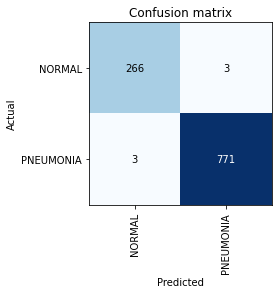

In [18]:
interpret=ClassificationInterpretation.from_learner(learner)
interpret.plot_confusion_matrix()

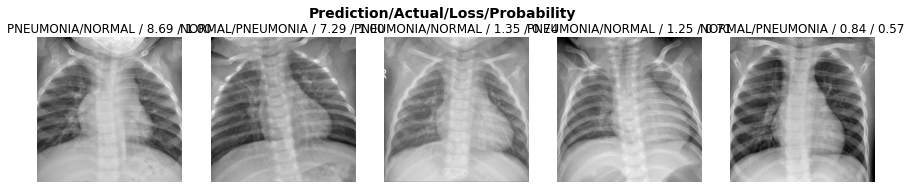

In [9]:
interpret.plot_top_losses(5, nrows=1)

In [13]:
predict_list=[]
for each_image in test:
  imag=PILImage.create(each_image)
  pred, pred_id, probs=learner.predict(imag)
  predict_list.append(pred)

In [14]:
sample_solution['id']=[n.name for n in test]
sample_solution['labels']=predict_list
sample_solution=sample_solution.replace({'labels':{'PNEUMONIA':1, 'NORMAL':0}})
sample_solution.set_index('id', inplace=True)

In [15]:
sample_solution.to_csv("PneumoniaPredictions.csv")